In [1]:
from z3 import *
import sys
from random import randint
from collections import defaultdict
from time import time
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def readGraph():
    g = defaultdict(list)
    file = open("edges.txt", "r")
    edges = file.readlines()
    edges = set(edges)
    n=0
    new_edges = []
    for t in edges:
        x,y = map(int,t.split(','))
        new_edges.append((x,y))
        n = max(n,max(x,y))
        g[x].append(y)
    file.close()
    return g, n+1, new_edges

In [3]:
visited = []
def dfs(graph, v):
    visited[v]=True
    
    for i in graph[v]:
        if visited[i]==False:
            dfs(graph, i)

In [4]:
g,n,edges = readGraph()
m = len(edges)

In [5]:
def atLeastOneColor(vs):
    C = True
    for i in vs:
        C = And(C,Or(i))
    return C

In [6]:
def differentColors(vs, cur_edges):
    C = True
    for a,b in cur_edges:
        for l in range(d):
            C=And(C,Or(Not(vs[a][l]), Not(vs[b][l])))
    return C

In [7]:
def solve(phi):
    s = Solver()
    s.add(phi)
    r = s.check()
    if r == sat:
        m = s.model()
        #print(m)
#         for i in range(n):
#             got_it = False
#             for j in range(d):
#                 if is_true(m[vs[i][j]]):
#                     print("Node: {}, Color: {}".format(i,j))
#                     got_it = True
#             if got_it == False:
#                 print("Node: {}, No Color".format(i))
    else:
        print("unsat")

In [17]:
d = 3
timeTaken = []
timeSteps = []
print("d: ", d)
for k in range(1, 4000, 100):
    timeSteps.append(k)
    tic = time()
    vs = [  [Bool("p_{}_{}".format(i,j))  for j in range(d)] for i in range(n)]
    cur_edges = edges[0:k]
    Constraints = []
    Constraints.append(atLeastOneColor(vs))
    Constraints.append(differentColors(vs, cur_edges))
    solve(And(Constraints))
    timeTaken.append(time()-tic)
    print("k: {}, time: {}".format(k,timeTaken[-1]))

d:  3
k: 1, time: 0.2585599422454834
k: 101, time: 0.31806206703186035
k: 201, time: 0.47243809700012207
k: 301, time: 0.5116968154907227
k: 401, time: 0.6180973052978516
k: 501, time: 0.7309818267822266
k: 601, time: 0.8955898284912109
k: 701, time: 0.9951379299163818
k: 801, time: 0.9974370002746582
k: 901, time: 1.1063120365142822
k: 1001, time: 1.2337279319763184
k: 1101, time: 1.3511416912078857
unsat
k: 1201, time: 65.56221723556519
unsat
k: 1301, time: 4.134710788726807
unsat
k: 1401, time: 1.8281137943267822
unsat
k: 1501, time: 1.716414213180542
unsat
k: 1601, time: 1.7582528591156006
unsat
k: 1701, time: 2.0245771408081055
unsat
k: 1801, time: 2.1685009002685547
unsat
k: 1901, time: 2.0913290977478027
unsat
k: 2001, time: 2.1697559356689453
unsat
k: 2101, time: 2.172960042953491
unsat
k: 2201, time: 2.3106160163879395
unsat
k: 2301, time: 2.383898973464966
unsat
k: 2401, time: 2.494603157043457
unsat
k: 2501, time: 2.5582690238952637
unsat
k: 2601, time: 2.8019230365753174
un

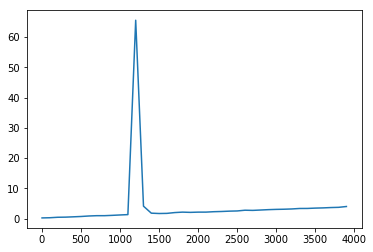

In [18]:
plt.plot(timeSteps,timeTaken)